In [18]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline
import glob

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

#import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_rows', 10)


In [2]:
s1=yf.Ticker("SBIN.NS")
df1= s1.history(period="5y")
print(df1.head())
#df1.to_csv(r'/Users/boltwrath/Desktop/Main/selected/SBIN.csv', index = 'Date')

NameError: name 'yf' is not defined

In [ ]:
s2=yf.Ticker("SUNPHARMA.NS")
df2= s2.history(period="5Y")
print(df2.head())
#df2.to_csv(r'/Users/boltwrath/Desktop/Main/selected/SUNPHARMA.csv', index = 'Date')

In [ ]:
s3=yf.Ticker("PAYTM.NS")
df3= s3.history(period="5Y")
print(df3.head())
df3.to_csv(r'/Users/boltwrath/Desktop/Main/selected/PAYTM.csv', index = 'Date')

In [ ]:
s4=yf.Ticker("LICHSGFIN.NS")
df4= s4.history(period="5Y")
print(df4.head())
df4.to_csv(r'/Users/boltwrath/Desktop/Main/selected/LICHSGFIN.csv', index = 'Date')

In [ ]:
s5=yf.Ticker("APOLLOHOSP.NS")
df5= s5.history(period="5Y")
print(df5.head())
df5.to_csv(r'/Users/boltwrath/Desktop/Main/selected/APOLLOHOSP.csv', index = 'Date')

In [ ]:
s6=yf.Ticker("TECHM.NS")
df6= s6.history(period="6Y")
print(df6.head())
df6.to_csv(r'/Users/boltwrath/Desktop/Main/selected/TECHM.csv', index = 'Date')

In [ ]:
s7=yf.Ticker("TATAPOWER.NS")
df7= s7.history(period="5Y")
print(df7.head())
df7.to_csv(r'/Users/boltwrath/Desktop/Main/selected/TATAPOWER.csv', index = 'Date')

In [ ]:
s8=yf.Ticker("WIPRO.NS")
df8= s8.history(period="5y")
print(df8.head())
df8.to_csv(r'/Users/boltwrath/Desktop/Main/selected/WIPRO.csv', index = 'Date')

In [ ]:
s9=yf.Ticker("RELIANCE.NS")
df9= s9.history(period="5y")
print(df9.head())
df9.to_csv(r'/Users/boltwrath/Desktop/Main/selected/RELIANCE.csv', index = 'Date')

In [ ]:
s10=yf.Ticker("TCS.NS")
df10= s10.history(period="5y")
print(df10.head())
df10.to_csv(r'/Users/boltwrath/Desktop/Main/selected/TCS.csv', index = 'Date')

In [19]:
PATH = "/Users/boltwrath/Desktop/Main/selected/"

# Start end date defaults
S_DATE = "2017-02-01"
E_DATE = "2022-12-06"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

In [20]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
# 3263 total stocks
tickers.sort()
len(tickers)


11

In [21]:
def get_stock_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col=0)
    except FileNotFoundError as ex:
        print(ex)
    else:
        return df


In [22]:
def add_daily_return_to_df(df):
    df['daily_return'] = (df['Close'] / df['Close'].shift(1)) - 1
    # Save data to a CSV file
    #df.to_csv(PATH + ticker + '.csv')
    return df  

In [23]:
#Add Cumulative Returns
def add_cum_return_to_df(df):
    df['cum_return'] = (1 + df['daily_return']).cumprod()
    # df.to_csv(PATH + ticker + '.csv')
    return df

In [24]:
#Add Bollinger Bands
# Here we will add a middle band (20 days), upper band (20 days + 1.96 std),
# and lower band (20 days - 1.96 std)
def add_bollinger_bands(df):
    df['middle_band'] = df['Close'].rolling(window=20).mean()
    df['upper_band'] = df['middle_band'] + 1.96 * df['Close'].rolling(window=20).std()
    df['lower_band'] = df['middle_band'] - 1.96 * df['Close'].rolling(window=20).std()
    # df.to_csv(PATH + ticker + '.csv')
    return df

In [25]:
#Add Ichimoku Data 
def add_Ichimoku(df):
    # Conversion
    hi_val = df['High'].rolling(window=9).max()
    low_val = df['Low'].rolling(window=9).min()
    df['Conversion'] = (hi_val + low_val) / 2

    # Baseline
    hi_val2 = df['High'].rolling(window=26).max()
    low_val2 = df['Low'].rolling(window=26).min()
    df['Baseline'] = (hi_val2 + low_val2) / 2

    # Spans
    df['SpanA'] = ((df['Conversion'] + df['Baseline']) / 2).shift(26)
    hi_val3 = df['High'].rolling(window=52).max()
    low_val3 = df['Low'].rolling(window=52).min()
    df['SpanB'] = ((hi_val3 + low_val3) / 2).shift(26)
    df['Lagging'] = df['Close'].shift(-26)

    return df

In [26]:
for x in tickers:
    try:
        print("Working on :", x)
        new_df = get_stock_df_from_csv(x)
        new_df = add_daily_return_to_df(new_df)
        new_df = add_cum_return_to_df(new_df)
        new_df = add_bollinger_bands(new_df)
        new_df = add_Ichimoku(new_df)
        new_df.to_csv(PATH + x + '.csv')
    except Exception as ex:
        print(ex)


Working on : .DS_Store
[Errno 2] No such file or directory: '/Users/boltwrath/Desktop/Main/selected/.DS_Store.csv'
'NoneType' object is not subscriptable
Working on : APOLLOHOSP
Working on : LICHSGFIN
Working on : PAYTM
Working on : RELIANCE
Working on : SBIN
Working on : SUNPHARMA
Working on : TATAPOWER
Working on : TCS
Working on : TECHM
Working on : WIPRO


In [ ]:
# Merge Multiple Stocks in One Dataframe by Column Name

In [27]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_stock_df_from_csv(x)
        
        # NEW Check if your dataframe has duplicate indexes
        # if not df.index.is_unique:
        #     # Delete duplicates 
        #     df = df.loc[~df.index.duplicated(), :]
        
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [ ]:
# Stock portfolio

In [28]:
port_list = ['SBIN', 'SUNPHARMA', 'PAYTM', 'LICHSGFIN',
'APOLLOHOSP', 'TECHM', 'TATAPOWER', 'WIPRO', 'RELIANCE',
'TCS']
num_stocks = len(port_list)
num_stocks

10

In [ ]:
# Merge All Data by Closing Price

In [29]:
mult_df = merge_df_by_column_name('Close',  S_DATE, 
                                  E_DATE, *port_list)
mult_df

,SBIN,SUNPHARMA,PAYTM,LICHSGFIN,APOLLOHOSP,TECHM,TATAPOWER,WIPRO,RELIANCE,TCS
Date,,,,,,,,,,
2017-02-27,263.413849,645.110046,NaN,511.974609,1269.901855,432.722443,70.783569,181.106522,597.922791,1131.752197
2017-02-28,264.346741,649.462097,NaN,507.674561,1278.347900,432.376099,70.697975,180.755219,597.512451,1121.024658
2017-03-01,266.850739,664.431396,NaN,507.946136,1302.114624,432.679138,70.141640,180.662781,595.799255,1127.070190
2017-03-02,262.480957,646.736206,NaN,500.341949,1296.909424,432.808990,69.371323,181.272919,596.885193,1137.025146
2017-03-03,260.271545,656.588074,NaN,502.333527,1224.087036,436.099030,70.098846,182.622665,607.406311,1133.660889
...,...,...,...,...,...,...,...,...,...,...
2022-02-21,511.850006,843.849976,807.700012,372.600006,4426.649902,1418.199951,225.000000,570.799988,2399.899902,3719.399902
2022-02-22,498.399994,845.799988,815.900024,367.149994,4576.049805,1412.550049,222.649994,564.150024,2389.000000,3586.399902
2022-02-23,498.700012,840.250000,821.950012,363.049988,4610.799805,1413.300049,221.199997,567.099976,2374.050049,3563.800049


In [ ]:
#Plot price of investment over total dataset

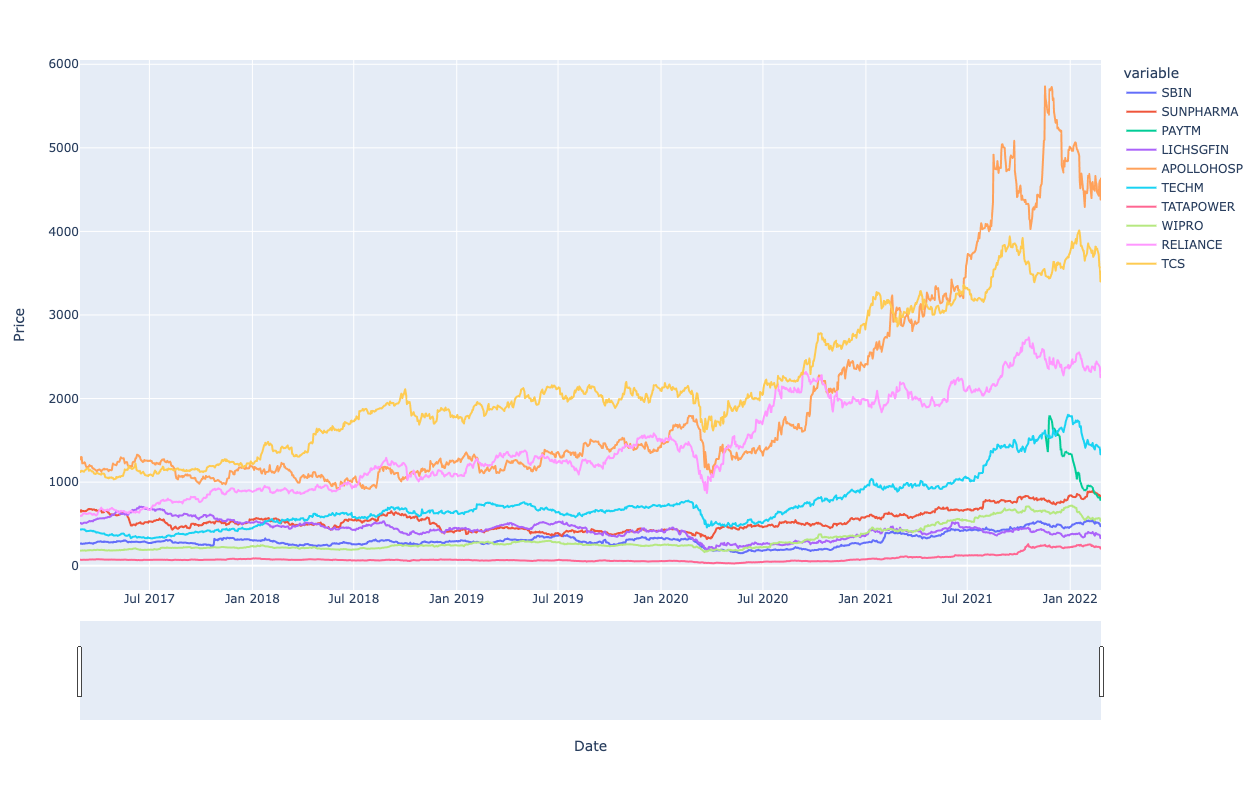

In [32]:
# Plot out prices for each stock
fig = px.line(mult_df, x=mult_df.index, y=mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=800, width=1200, 
                  showlegend=True)
fig.show()

In [ ]:
# cumulative retun for all stocks

In [31]:
mult_cum_df = merge_df_by_column_name('cum_return',  S_DATE, 
                                  E_DATE, *port_list)
mult_cum_df

,SBIN,SUNPHARMA,PAYTM,LICHSGFIN,APOLLOHOSP,TECHM,TATAPOWER,WIPRO,RELIANCE,TCS
Date,,,,,,,,,,
2017-02-27,NaN,NaN,NaN,NaN,NaN,1.215034,NaN,NaN,NaN,NaN
2017-02-28,1.003542,1.006746,NaN,0.991601,1.006651,1.214062,0.998791,0.998060,0.999314,0.990521
2017-03-01,1.013047,1.029950,NaN,0.992131,1.025366,1.214912,0.990931,0.997550,0.996448,0.995863
2017-03-02,0.996458,1.002521,NaN,0.977279,1.021267,1.215277,0.980048,1.000919,0.998265,1.004659
2017-03-03,0.988071,1.017792,NaN,0.981169,0.963923,1.224515,0.990327,1.008372,1.015861,1.001686
...,...,...,...,...,...,...,...,...,...,...
2022-02-21,1.943140,1.308071,0.517491,0.727770,3.485820,3.982140,3.178704,3.151736,4.013729,3.286408
2022-02-22,1.892080,1.311094,0.522745,0.717125,3.603467,3.966276,3.145504,3.115018,3.995499,3.168891
2022-02-23,1.893219,1.302491,0.526621,0.709117,3.630832,3.968381,3.125019,3.131306,3.970496,3.148923


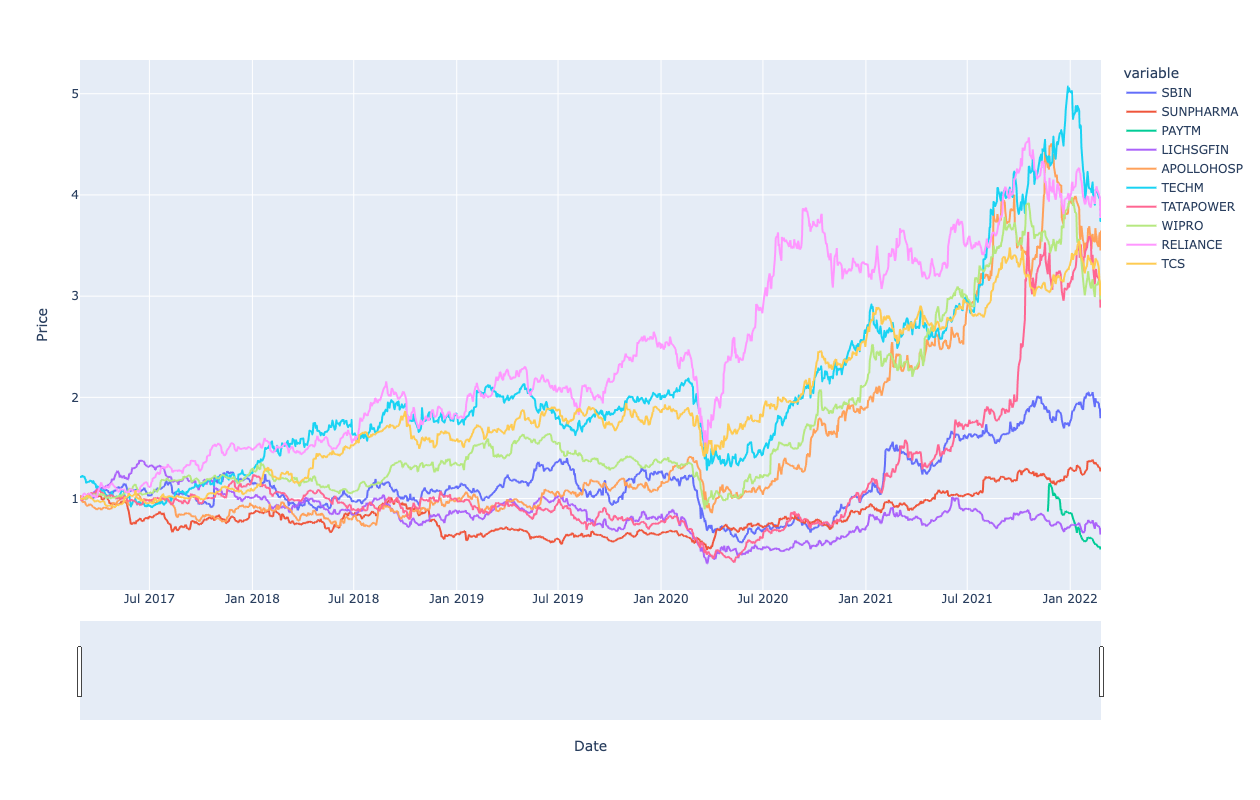

In [34]:
# Plot out cumulative returns for each stock since
fig = px.line(mult_cum_df, x=mult_cum_df.index, y=mult_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height=800, width=1200, 
                  showlegend=True)
fig.show()

In [ ]:
#Mean returns

In [35]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

SBIN          0.123591
SUNPHARMA     0.051760
PAYTM        -2.489848
LICHSGFIN    -0.083876
APOLLOHOSP    0.263899
TECHM         0.237880
TATAPOWER     0.231204
WIPRO         0.228417
RELIANCE      0.273245
TCS           0.231389
dtype: float64

In [ ]:
# Correlation

In [36]:
returns.corr()

,SBIN,SUNPHARMA,PAYTM,LICHSGFIN,APOLLOHOSP,TECHM,TATAPOWER,WIPRO,RELIANCE,TCS
SBIN,1.000000,0.266270,0.187070,0.526935,0.207927,0.239707,0.432751,0.205202,0.351411,0.176804
SUNPHARMA,0.266270,1.000000,0.233036,0.260366,0.230410,0.271114,0.259938,0.184029,0.253755,0.172903
PAYTM,0.187070,0.233036,1.000000,0.295918,0.314022,0.279090,0.328744,0.225300,0.270212,0.197425
LICHSGFIN,0.526935,0.260366,0.295918,1.000000,0.246126,0.194639,0.395521,0.203449,0.326013,0.170647
APOLLOHOSP,0.207927,0.230410,0.314022,0.246126,1.000000,0.240619,0.253348,0.226268,0.217681,0.174381
TECHM,0.239707,0.271114,0.279090,0.194639,0.240619,1.000000,0.251121,0.467022,0.298000,0.468670
TATAPOWER,0.432751,0.259938,0.328744,0.395521,0.253348,0.251121,1.000000,0.207358,0.303828,0.144377
WIPRO,0.205202,0.184029,0.225300,0.203449,0.226268,0.467022,0.207358,1.000000,0.252367,0.467903
RELIANCE,0.351411,0.253755,0.270212,0.326013,0.217681,0.298000,0.303828,0.252367,1.000000,0.293219
TCS,0.176804,0.172903,0.197425,0.170647,0.174381,0.468670,0.144377,0.467903,0.293219,1.000000


In [ ]:
#generate random weight equal to 1

In [37]:
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.01353248 0.15986507 0.13620956 0.0685104  0.047234   0.13867302
 0.17786389 0.04223921 0.090407   0.12546537]
Total Weight : 1.0


In [ ]:
#Calculate return using random weighting

In [38]:
np.sum(weights * returns.mean()) * 252

-0.1849821758752157

In [ ]:
#Calculate volatility

In [39]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.22829168472582365

In [ ]:
# Analyze risk and return of 10000 combinations

In [48]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = ret_1 / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([-0.21281475, -0.10580014, -0.24278198, ...,  0.1495466 ,
        -0.247798  ,  0.12264307]),
 array([0.22811577, 0.21445806, 0.23966684, ..., 0.19919236, 0.23524747,
        0.19294821]),
 array([-0.93292433, -0.49333718, -1.01299779, ...,  0.75076476,
        -1.05335034,  0.63562687]),
 array([[0.04888418, 0.12644964, 0.14436203, ..., 0.15684775, 0.12840545,
         0.02906879],
        [0.17074505, 0.06668772, 0.1051505 , ..., 0.13380423, 0.06228082,
         0.16874092],
        [0.04946822, 0.11661117, 0.16123009, ..., 0.00922656, 0.0264049 ,
         0.14118919],
        ...,
        [0.04664942, 0.0579053 , 0.01218845, ..., 0.15454426, 0.16256393,
         0.13599192],
        [0.04207   , 0.05516007, 0.16400193, ..., 0.02529146, 0.08125912,
         0.15540313],
        [0.01016954, 0.14735799, 0.03168089, ..., 0.17410635, 0.14501029,
         0.18421783]]))

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

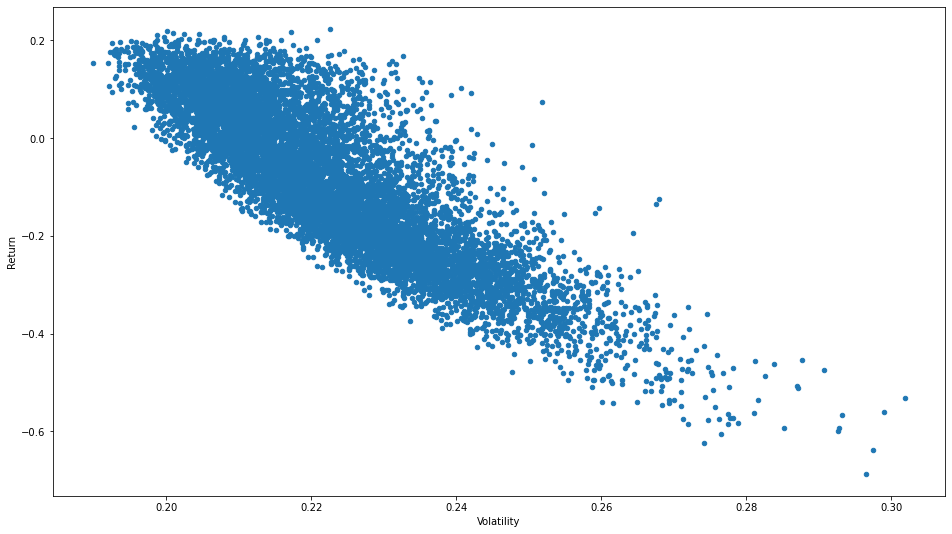

In [49]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

In [50]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])

Stock : SBIN : 0.77
Stock : SUNPHARMA : 10.33
Stock : PAYTM : 0.15
Stock : LICHSGFIN : 0.07
Stock : APOLLOHOSP : 28.52
Stock : TECHM : 4.86
Stock : TATAPOWER : 3.39
Stock : WIPRO : 23.79
Stock : RELIANCE : 5.88
Stock : TCS : 22.23

Volatility : 0.2001095820772063
Return : 0.2190106955822283


In [51]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

In [ ]:
# Portfolio Weighting

In [52]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts


In [ ]:
#value of portfolio by date

In [53]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close',  date, 
                                  date, *port_list)
    # Convert from dataframe to Python list
    port_prices = port_prices.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices


In [ ]:
#Approx portfolio weighting 

In [56]:
port_list = ['SBIN', 'SUNPHARMA', 'PAYTM', 'LICHSGFIN',
'APOLLOHOSP', 'TECHM', 'TATAPOWER', 'WIPRO', 'RELIANCE',
'TCS']

port_wts = [1, 10, 0, 0, 28, 4, 3, 23, 5, 22]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Close',  '2022-01-07', 
                                  '2022-01-07', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()

# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(10000, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date(E_DATE, tot_shares, port_list)

Shares : [20, 121, 1, 1, 55, 23, 130, 323, 20, 57]
Share Cost : [9825.0, 99517.67004394531, 1231.5999755859375, 376.0, 276201.75537109375, 39188.54943847656, 29874.000396728516, 229440.93267822266, 48720.0, 219264.20727539062]
Total Investment : 953639.7151794434
Stock Weights : [0.01030263300029536, 0.1043556266165146, 0.0012914730332452557, 0.00039427888123267735, 0.28962904016546936, 0.04109366337695214, 0.03132629642118798, 0.24059498469508422, 0.051088476312915, 0.22992352749710343]


[]